In [1]:
import collections
import requests
import json
import re
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Test

In [2]:
with open('../../data/speeches_20.jsonl', 'r', encoding = 'utf8') as fp:
    data = list(fp)
speeches = []
for line in data:
    speeches.append(json.loads(line))

In [3]:
def groupSpeechesByParty(speeches):
    groupedSpeeches = {}
    for speech in speeches:
        tpo = speech['party']
        if tpo in groupedSpeeches:
            groupedSpeeches[tpo].append(speech)
        else:
            groupedSpeeches[tpo] = [speech]
    return groupedSpeeches

In [4]:
def clean_partyname(speeches):
    for speech in speeches:
        if 'BÜNDNIS\xa090/DIE GRÜNEN' in speech['party']:
            speech.update({'party': 'BÜNDNIS 90/DIE GRÜNEN'})
clean_partyname(speeches)

In [5]:
groupbyparty = groupSpeechesByParty(speeches)
print(f'alle Reden: {len(speeches)}') # Anzahl aller Reden
#for ele in groupbyparty:
#    print(len(groupbyparty[ele]))
# Überprüfung mit bspw.: len(groupbyparty['SPD'])

alle Reden: 2777


In [6]:
def extract_comments(speeches):
    regex = "{(.*?)}" # hier die genaue Definition der Kommentare vom Parser <<< >
    comments = []
    modified_speeches = []
    for speech in speeches:
        text = speech['text']
        matches = re.findall(regex,text)
        speech['comments'] = matches
        modified_speeches.append(speech)
    return modified_speeches
# Funktionsaufruf: speeches_comments = extract_comments(speeches)
speeches_comments = extract_comments(speeches)
# Funktionsausgabe: print(speeches_comments[0]['comments'])
#                   print(speeches_comments[0]['party'])

In [7]:
# filter: comments per party with contain words and not contain words
def filter_with_complex_non_words(search_terms , non_words , speeches_comments):
    filtered_speeches = []
    for speech in speeches:
        for comment in speech['comments']:
            if all([term in comment for term in search_terms]) and not any([term in comment for term in non_words]):
                filtered_speeches.append(speech)
    return filtered_speeches
# Funktionsaufruf:  specific_and_non_search = filter_with_complex_non_words(['Beifall','CDU'],['Zuruf'],speeches_comments)
# Funktionsausgabe: print(specific_and_non_search[0])                               enthält AND enthält nicht
#                   print(len(specific_and_non_search))
specific_and_non_search = filter_with_complex_non_words([],[],speeches)
print(f'Gesamtsumme aller Kommentare: {len(specific_and_non_search)}')

Gesamtsumme aller Kommentare: 22099


In [8]:
specific_and_non_search = filter_with_complex_non_words(['LINKE'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von Linke:        {len(specific_and_non_search)}')
specific_and_non_search = filter_with_complex_non_words(['SPD'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von SPD:          {len(specific_and_non_search)}')
specific_and_non_search = filter_with_complex_non_words(['BÜNDNIS 90/DIE GRÜNEN'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von Grünen:       {len(specific_and_non_search)}')
specific_and_non_search = filter_with_complex_non_words(['CDU/CSU'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von CDU/CSU:      {len(specific_and_non_search)}')
specific_and_non_search = filter_with_complex_non_words(['FDP'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von FDP:          {len(specific_and_non_search)}')
specific_and_non_search = filter_with_complex_non_words(['AfD'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von AfD:          {len(specific_and_non_search)}')
specific_and_non_search = filter_with_complex_non_words(['fraktionslos'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von Fraktionslos: {len(specific_and_non_search)}')

Anzahl Kommentare mit Beteiligung von Linke:        3027
Anzahl Kommentare mit Beteiligung von SPD:          10206
Anzahl Kommentare mit Beteiligung von Grünen:       6039
Anzahl Kommentare mit Beteiligung von CDU/CSU:      6614
Anzahl Kommentare mit Beteiligung von FDP:          8571
Anzahl Kommentare mit Beteiligung von AfD:          4555
Anzahl Kommentare mit Beteiligung von Fraktionslos: 48


In [9]:
# function: speech_of_party
def filter_party (party , speeches_comments):
    speeches_of_party = []
    for speech in speeches:
        if speech['party'] == party:
            speeches_of_party.append(speech)
    return speeches_of_party

# function: speeches_of_party_with_keywords
def filter_speeches_of_party(search_terms , non_words , speeches_of_party):
    comments_speaker_of_party = []
    for speech in speeches_of_party:
        for comment in speech['comments']:
            if all([term in comment for term in search_terms]) and not any([term in comment for term in non_words]):
                comments_speaker_of_party.append(comment)
    return comments_speaker_of_party

In [10]:
keywords = ['Beifall','Zuruf','lachen','Widerspruch','Heiterkeit','Unsinn','Gegenruf']
list_party = ['DIE LINKE','SPD','BÜNDNIS 90/DIE GRÜNEN','CDU/CSU','FDP','AfD','fraktionslos']

In [11]:
speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0]],[],speeches_of_party)
print(f'Redner-Partei {list_party[0]} erhielt insgesamt {keywords[0]}: {len(speeches_of_party_with_keywords)}')
speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],'LINKE'] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[0]}: {len(speeches_of_party_with_keywords)}')
speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[1]] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[1]}: {len(speeches_of_party_with_keywords)}')
speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],'GRÜNE'] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[2]}: {len(speeches_of_party_with_keywords)}')
speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],'CDU'] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[3]}: {len(speeches_of_party_with_keywords)}')
speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[4]] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[4]}: {len(speeches_of_party_with_keywords)}')
speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[5]] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[5]}: {len(speeches_of_party_with_keywords)}')
speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],'raktionslos'] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[6]}: {len(speeches_of_party_with_keywords)}')

speeches_of_party = filter_party(list_party[2],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],'GRÜNE'] , [] , speeches_of_party)
print(f'Redner von {list_party[2]} erhielt {keywords[0]} von der {list_party[2]}: {len(speeches_of_party_with_keywords)}')

Redner-Partei DIE LINKE erhielt insgesamt Beifall: 1503
Redner von DIE LINKE erhielt Beifall von der DIE LINKE: 1298
Redner von DIE LINKE erhielt Beifall von der SPD: 348
Redner von DIE LINKE erhielt Beifall von der BÜNDNIS 90/DIE GRÜNEN: 326
Redner von DIE LINKE erhielt Beifall von der CDU/CSU: 111
Redner von DIE LINKE erhielt Beifall von der FDP: 246
Redner von DIE LINKE erhielt Beifall von der AfD: 97
Redner von DIE LINKE erhielt Beifall von der fraktionslos: 0
Redner von BÜNDNIS 90/DIE GRÜNEN erhielt Beifall von der BÜNDNIS 90/DIE GRÜNEN: 2448


In [12]:
speeches_of_party = filter_party(list_party[2],speeches)
print(list_party[2])
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0]] , [] , speeches_of_party)
print(len(speeches_of_party_with_keywords))
print(f'Redner von {list_party[2]} erhielt {keywords[0]} von der {list_party[2]}: {len(speeches_of_party_with_keywords)}')

BÜNDNIS 90/DIE GRÜNEN
2744
Redner von BÜNDNIS 90/DIE GRÜNEN erhielt Beifall von der BÜNDNIS 90/DIE GRÜNEN: 2744


In [13]:
# Alle Kommentare mit Beifall
#speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0]] ,[], speeches_comments) # Achtung: speeches_comments statt speeches_of_party  
len(speeches_of_party_with_keywords)

15735

In [38]:
comments_to = {'BÜNDNIS 90/DIE GRÜNEN' : ['all comments to Grüne'], 
               'CDU/CSU'               : ['all comments to '],
               'Fraktionslos'          : ['all comments to '],
               'AfD'                   : ['all comments to '],
               'SPD'                   : ['all comments to '],
               'FDP'                   : ['all comments to '],
               'DIE LINKE'             : ['all comments to Linke'] }
comments_to

{'BÜNDNIS 90/DIE GRÜNEN': ['all comments to Grüne'],
 'CDU/CSU': ['all comments to '],
 'Fraktionslos': ['all comments to '],
 'AfD': ['all comments to '],
 'SPD': ['all comments to '],
 'FDP': ['all comments to '],
 'DIE LINKE': ['all comments to Linke']}

In [39]:
party_names = []
for speech in speeches:
    if speech['party'] in party_names:
        pass
    else:
        party_names.append(speech['party'])  
party_names

['SPD',
 'CDU/CSU',
 'BÜNDNIS 90/DIE GRÜNEN',
 'FDP',
 'AfD',
 'DIE LINKE',
 'Fraktionslos']

In [59]:
comments_to = {}
for party in party_names:
    comments_to.update({ party : [] })

for speech in speeches:
    if len(speech['comments']) > 0:
        for comment in speech['comments']:
            for split_comment in comment.split('–'):
                comments_to[speech['party']].append(split_comment)
print(split_comment[0:19])

(Beifall beim BÜNDN


In [63]:
nParties = len(party_names)
relations_beifall = np.zeros((nParties,nParties))
party_search_string = ['LINKE','SPD','GRÜNE','CDU','FDP','AfD','raktionslos']
px = 0
py = 0
for xparty in comments_to:
    for comment in comments_to[xparty]:
        print(px
              .count(px))
        for py,yparty in enumerate(party_search_string):
            if yparty in comment:
                if 'Beifall' in comment:
                    relations_beifall[px,py] = relations_beifall[px,py] + 1
    px = px + 1

plt.imshow(relations_beifall)
plt.colorbar()
plt.show()

TypeError: descriptor 'count' for 'list' objects doesn't apply to a 'int' object

In [51]:
print(f'Beifall für Redner {comments_to[0]} von Partei {party_search_string[0]}: {relations_beifall[0,0]}')
print(f'Beifall für Redner {comments_to[0]} von Partei {party_search_string[1]}: {relations_beifall[0,1]}')
print(f'Beifall für Redner {xparty[0]} von Partei {party_search_string[2]}: {relations_beifall[0,2]}')
print(f'Beifall für Redner {xparty[0]} von Partei {party_search_string[3]}: {relations_beifall[0,3]}')
print(f'Beifall für Redner {xparty[0]} von Partei {party_search_string[4]}: {relations_beifall[0,4]}')
print(f'Beifall für Redner {xparty[0]} von Partei {party_search_string[5]}: {relations_beifall[0,5]}')
print(f'Beifall für Redner {xparty[0]} von Partei {party_search_string[6]}: {relations_beifall[0,6]}')

KeyError: 0

In [27]:
# Idee zur Programmierung: gehe beide Listen durch und iteriere
nParties = len(list_party)
relations_Beifall = np.zeros((nParties,nParties))
party_search_string = ['GRÜNEN','CDU/CSU','raktionslos','AfD','SPD','FDP','LINKE']
for px,x_party in enumerate(list_party): # for px,party in enumerate(list_party) = weist einer Liste eine lfd. Nummer zu 
    for py,y_party in enumerate(list_party):
        speeches_of_party = filter_party(list_party[px],speeches_comments)
        speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[py]],keywords[1:5],speeches_of_party)
        relations_Beifall[px,py] = len(speeches_of_party_with_keywords)
print(relations_Beifall[4,1])

1349.0


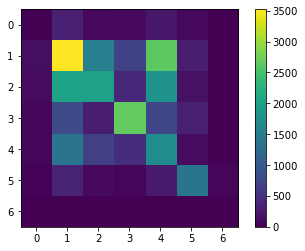

In [20]:
plt.imshow(relations_Beifall)
plt.colorbar()
plt.show()

In [28]:
speeches_of_party = filter_party(list_party[4],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[1]] , keywords[1:5] , speeches_of_party)
print(f'Redner von {list_party[4]} erhielt {keywords[0]} von der {list_party[1]}: {len(speeches_of_party_with_keywords)}')
speeches_of_party = filter_party(list_party[1],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[4]] , keywords[1:5] , speeches_of_party)
print(f'Redner von {list_party[1]} erhielt {keywords[0]} von der {list_party[4]}: {len(speeches_of_party_with_keywords)}')
speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[0]] , keywords[1:5] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[0]}: {len(speeches_of_party_with_keywords)}')

Redner von FDP erhielt Beifall von der SPD: 1349
Redner von SPD erhielt Beifall von der FDP: 2631
Redner von DIE LINKE erhielt Beifall von der DIE LINKE: 21


TypeError: Invalid shape (2,) for image data

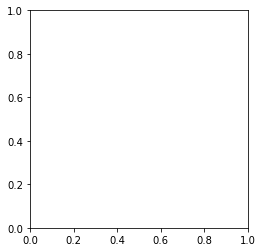

In [23]:
fig, ax = plt.subplots()

intersection_matrix = relations_Beifall[px,py],size=(len(list_party), len(list_party))


#np.random.randint(0, 10, size=(len(list_party), len(list_party)))

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for px in range(7):
    for py in range(7):
        c = intersection_matrix[px,py]
        ax.text(px, py, str(c), va='center', ha='center')